In [1]:
import numpy as np
import mne
from mne.viz import plot_sensors
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet

data_path ="E:/Data/EEG_Data/20221015110940_NE_ZW.1_example_1.edf"
raw = mne.io.read_raw_edf(data_path, preload=True)

Extracting EDF parameters from E:\Data\EEG_Data\20221015110940_NE_ZW.1_example_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35999  =      0.000 ...    71.998 secs...


In [2]:
# # locs⽂件地址
# locs_info_path = "E:/Data/EEG_Standard1/eeglab_chan32.locs"
# # 读取电极位置信息
# montage = mne.channels.read_custom_montage(locs_info_path)
# # 读取正确的导联名称
# new_chan_names = np.loadtxt(locs_info_path, dtype=str, usecols=3)
# # 读取旧的导联名称
# old_chan_names = raw.info["ch_names"]
# # 创建字典，匹配新旧导联名称
# chan_names_dict = {old_chan_names[i]:new_chan_names[i] for i in range(23)}
# # 更新数据中的导联名称
# raw.rename_channels(chan_names_dict)
# # 传⼊数据的电极位置信息
# raw.set_montage(montage)

In [3]:
# raw.plot_sensors(ch_type='eeg', show_names=True)

In [4]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: P7, P4, Cz, Pz, P3, P8, O1, O2, T8, F8, C4, F4, Fp2, Fz, C3, F3, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: 2022-10-15 11:09:49 UTC
 nchan: 23
 projs: []
 sfreq: 500.0 Hz
>


In [5]:
# MNE中⼀般默认将所有导联类型设成eeg
# 将两个EOG导联的类型设定为eog
chan_types_dict = {"EXT":"eog"}
raw.set_channel_types(chan_types_dict)

<RawEDF | 20221015110940_NE_ZW.1_example_1.edf, 23 x 36000 (72.0 s), ~6.3 MB, data loaded>

In [6]:
# raw.plot_sensors(ch_type='eeg', show_names=True)

Using matplotlib as 2D backend.


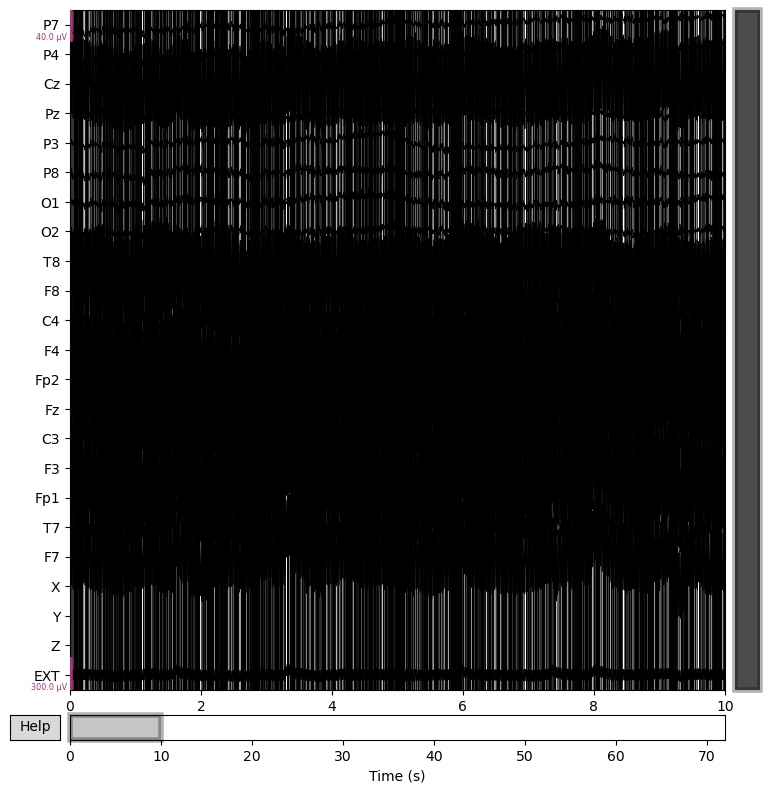

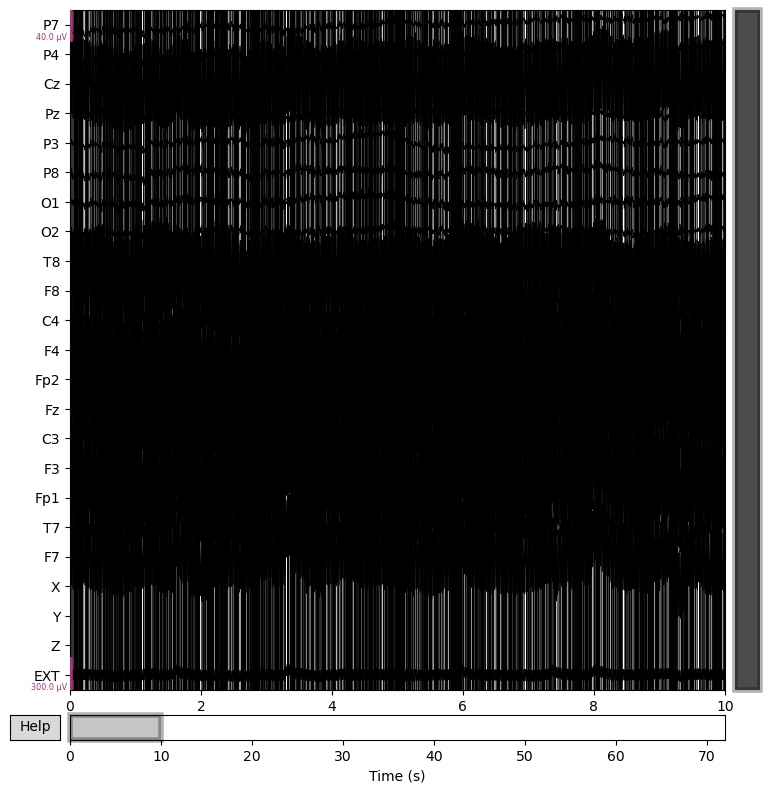

In [7]:
raw.plot(duration=10, n_channels=23, clipping=None)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


E:\Anaconda\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


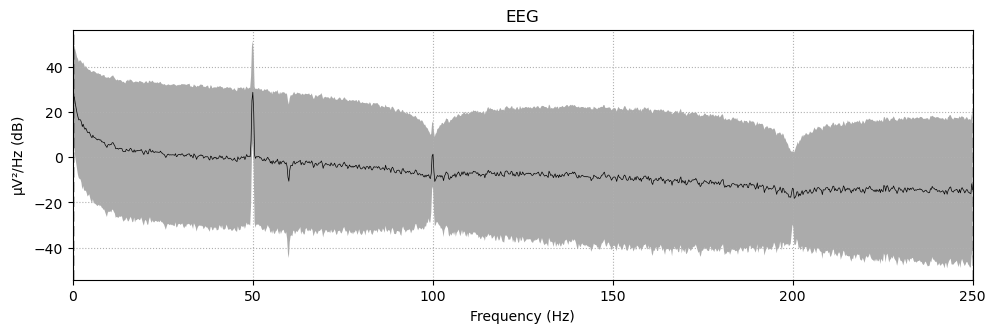

In [8]:
raw.plot_psd(average=True)

#滤波

In [9]:
raw = raw.notch_filter(freqs=(50))

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


E:\Anaconda\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


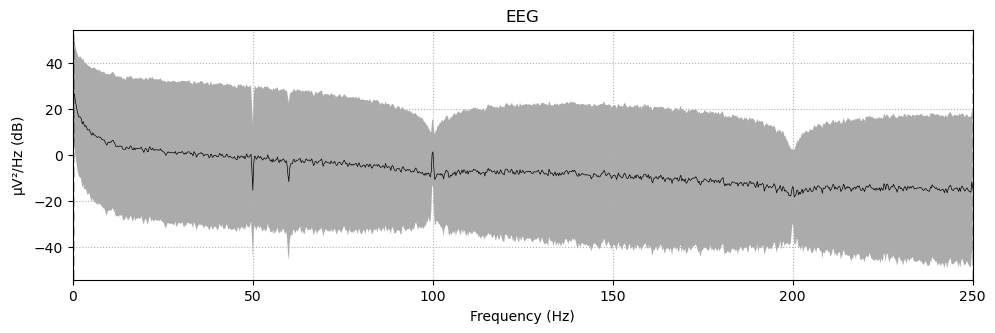

In [10]:
raw.plot_psd(average=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (1.650 sec)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


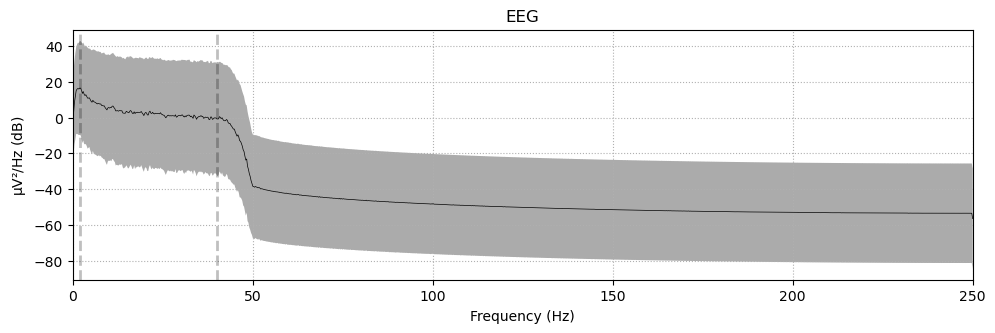

In [11]:
raw = raw.filter(l_freq=2, h_freq=40)
raw.plot_psd(average=True)

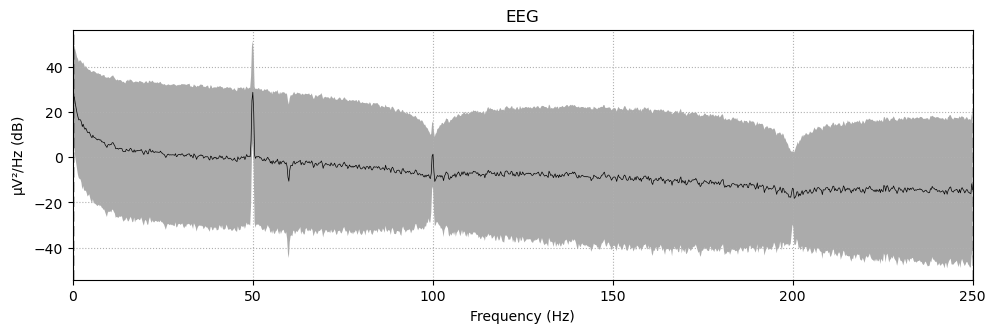

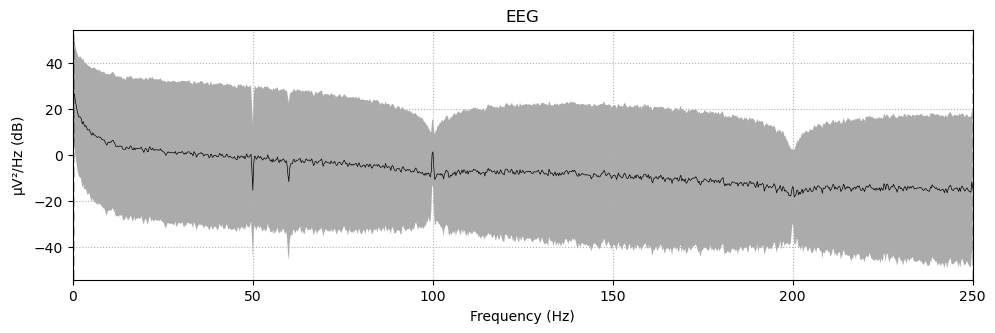

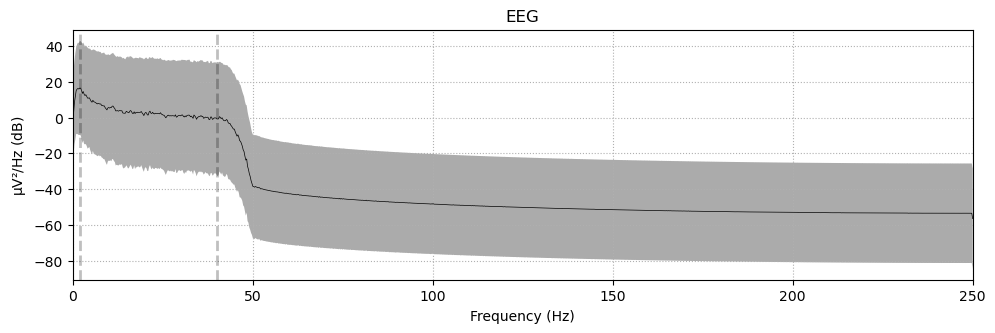

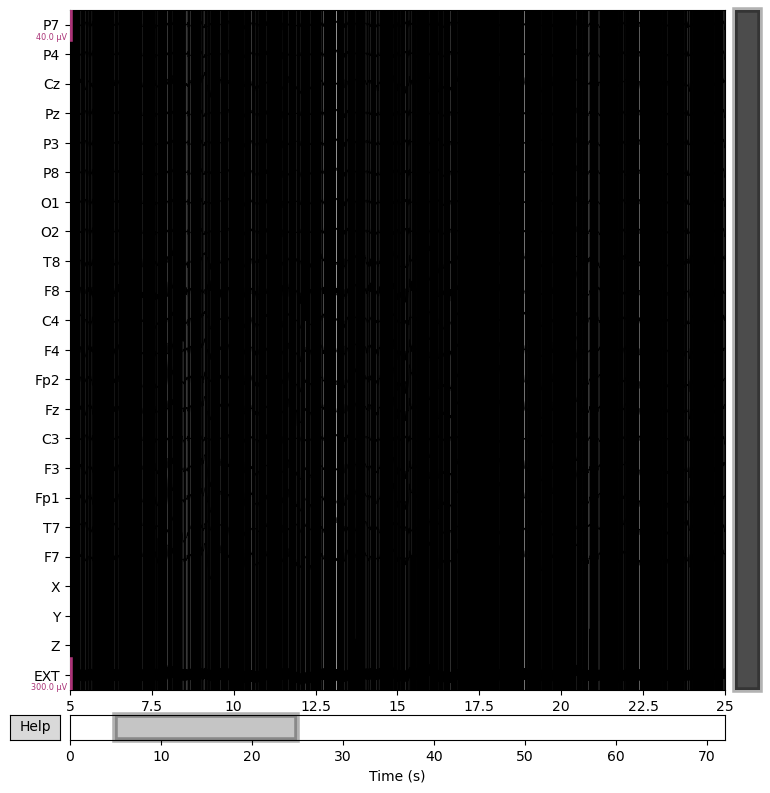

C:\Users\CUI\AppData\Local\Temp\ipykernel_8092\1513611375.py:2: MatplotlibDeprecationWarning: The key_press_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('key_press_event', KeyEvent(...)) instead.
  fig.canvas.key_press_event('a')
E:\Anaconda\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [12]:
fig = raw.plot(start=5, duration=20, n_channels=23, clipping=None) 
fig.canvas.key_press_event('a')

 问：
 30Hz的低通滤波及0.1Hz的⾼通滤波，为什么是这个频率？
 灰色的是什么，有什么影响？答：XYZ空通道产生的影响
 学习FIR滤波⽅法，IIR滤波⽅法。

In [13]:
# 坏道标记
raw.info['bads'].extend(['X', 'Y', 'Z'])
# 打印出当前的坏道
print(raw.info['bads'])

['X', 'Y', 'Z']


此处如何将多余的取消掉标记，从头运行就好了

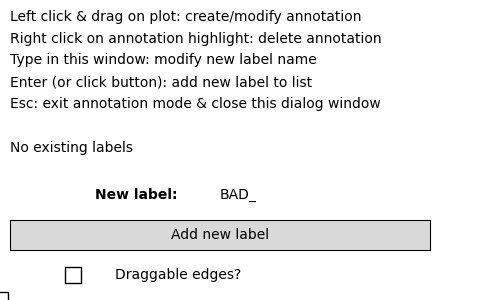

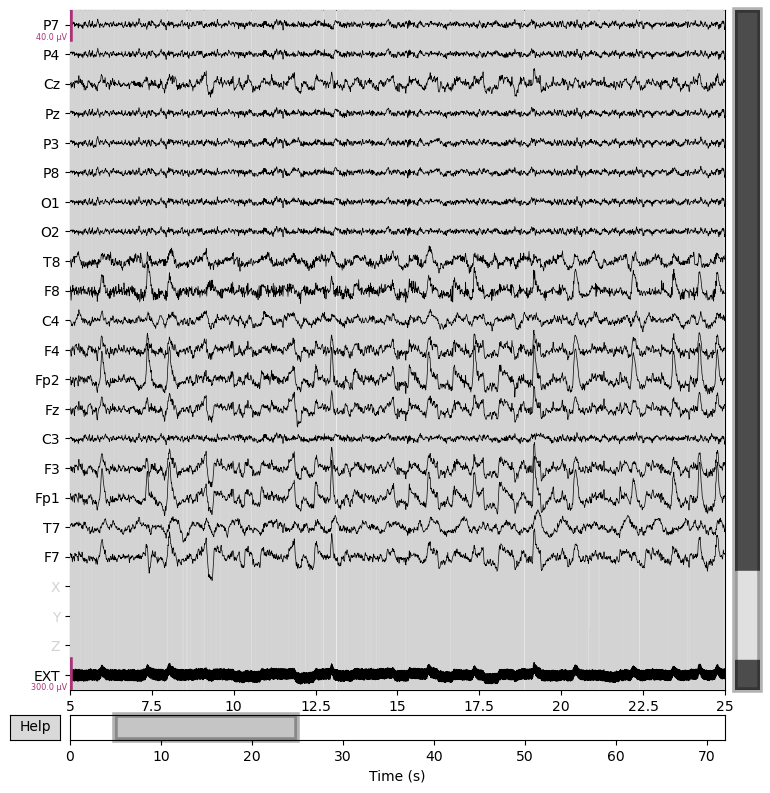

C:\Users\CUI\AppData\Local\Temp\ipykernel_8092\1513611375.py:2: MatplotlibDeprecationWarning: The key_press_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('key_press_event', KeyEvent(...)) instead.
  fig.canvas.key_press_event('a')
E:\Anaconda\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [14]:
fig = raw.plot(start=5, duration=20, n_channels=23, clipping=None) 
fig.canvas.key_press_event('a')

上述波形只有在选19个通道（也就是没有空通道时），才会没有密密麻麻的竖线。

In [15]:
ica = ICA(max_iter='auto')
raw_for_ica = raw.copy().filter(l_freq=1, h_freq=None)
ica.fit(raw_for_ica)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 19 components
Fitting ICA took 17.9s.


Method,fastica
Fit,929 iterations on raw data (36000 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=36000
    Range : 0 ... 35999 =      0.000 ...    71.998 secs
Ready.


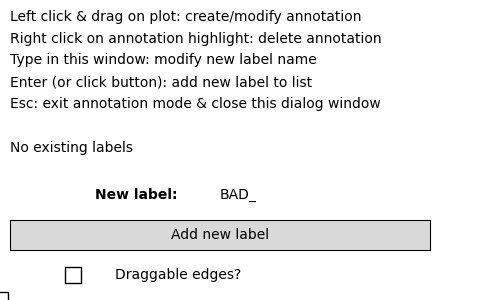

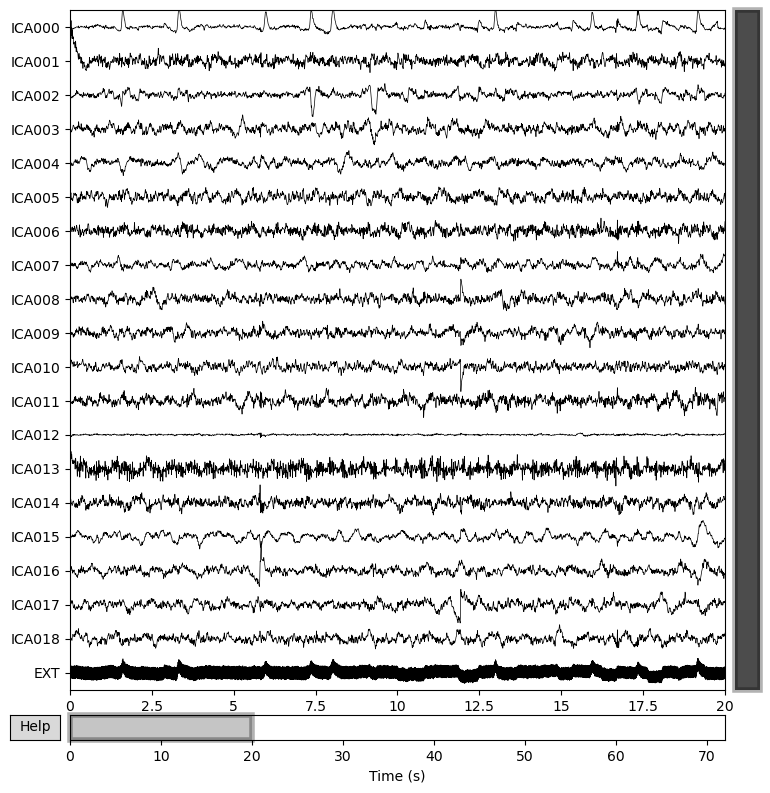

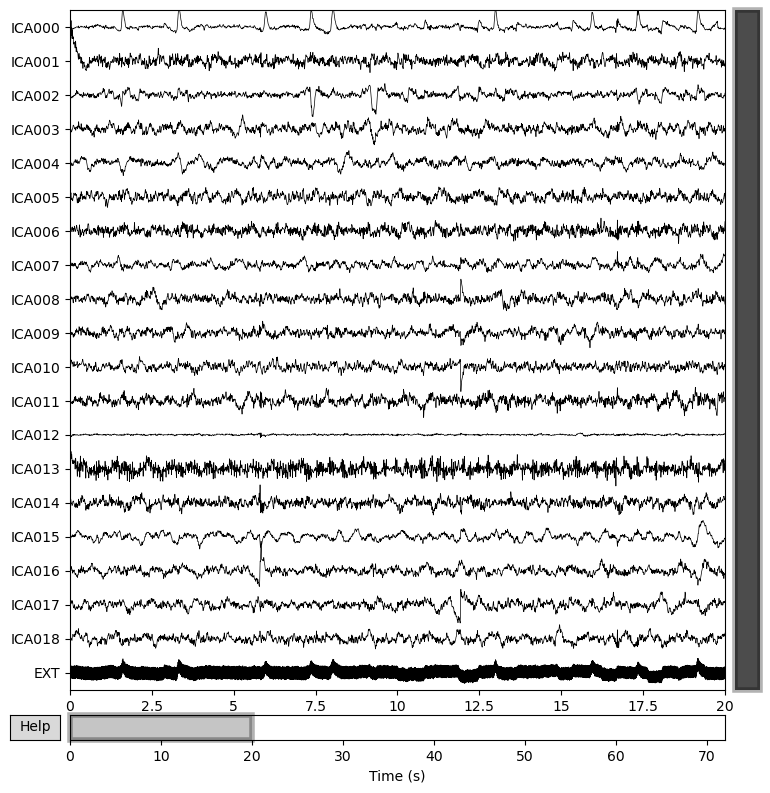

In [16]:
ica.plot_sources(raw_for_ica)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


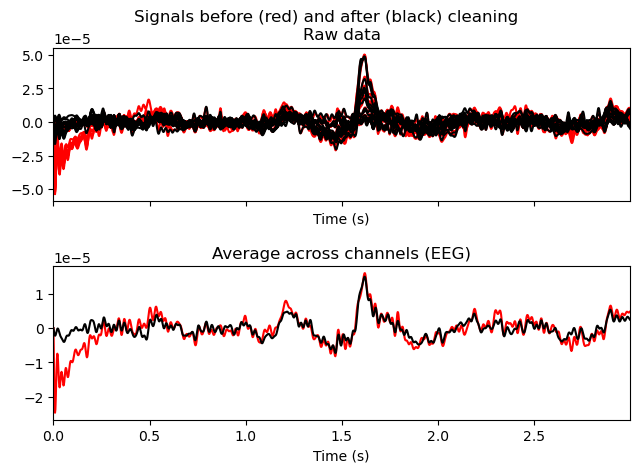

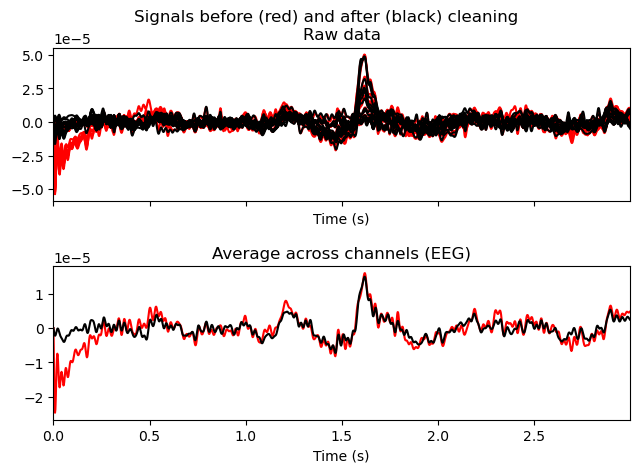

In [17]:
ica.plot_overlay(raw_for_ica, exclude=[1])

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


E:\Anaconda\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


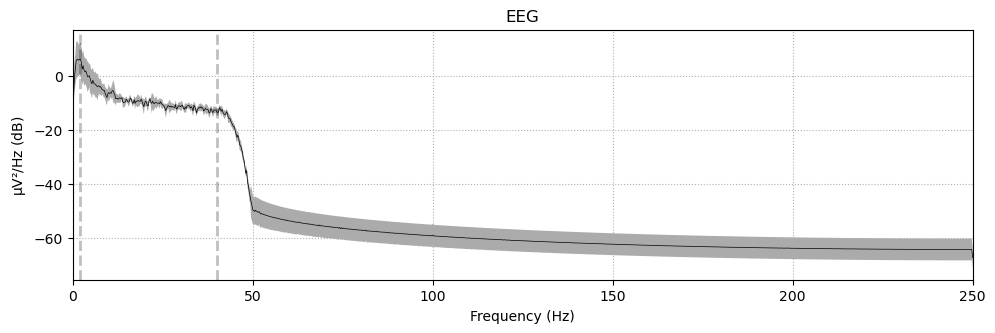

In [18]:
raw.plot_psd(average=True)

In [20]:
# 设定要剔除的成分序号
ica.exclude = [1]
# 应⽤到脑电数据上
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


<RawEDF | 20221015110940_NE_ZW.1_example_1.edf, 23 x 36000 (72.0 s), ~6.3 MB, data loaded>

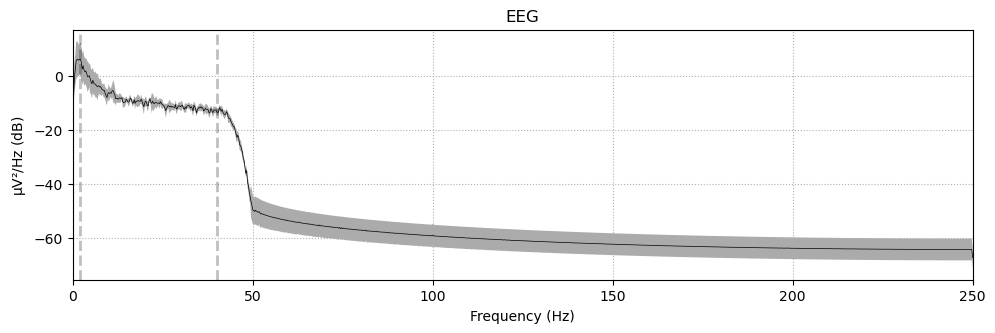

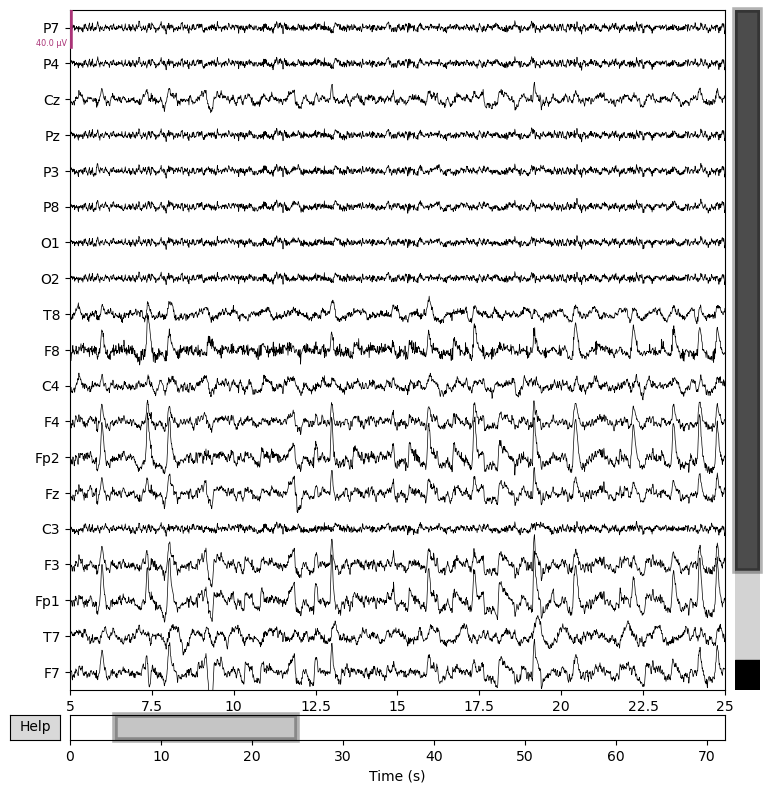

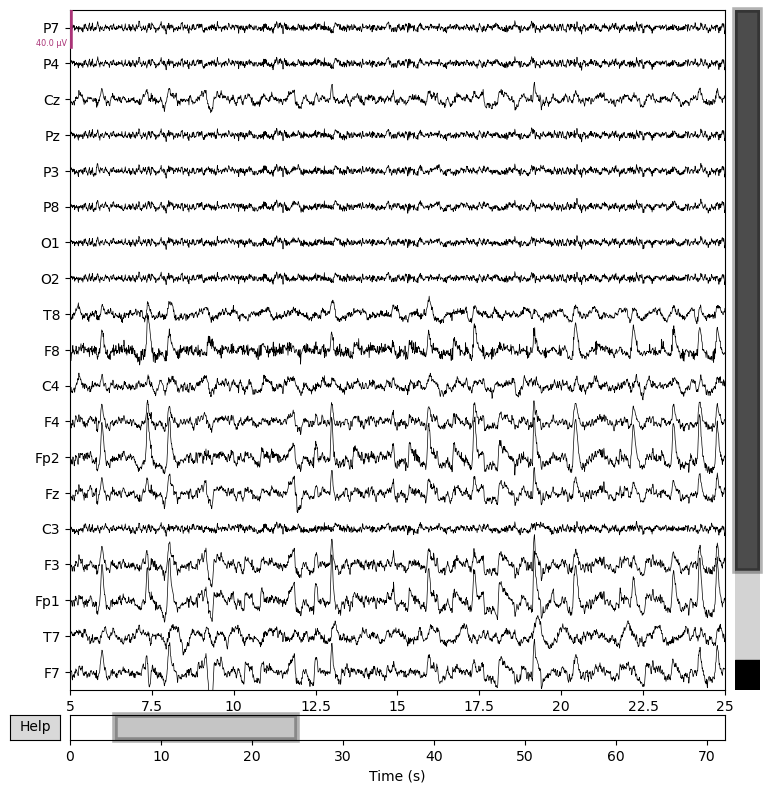

In [21]:
raw.plot(start=5, duration=20, n_channels=19, clipping=None)

In [22]:
#此处根据熊，采用单侧耳垂参考法
raw.set_eeg_reference(ref_channels=['EXT'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawEDF | 20221015110940_NE_ZW.1_example_1.edf, 23 x 36000 (72.0 s), ~6.3 MB, data loaded>

In [24]:
print(raw.annotations)

<Annotations | 0 segments>


Step 5 分段卡住了，print(raw.annotations)是0，下面都是0。下面的一系列都和两件事有关系，分别是大脑地图和分段。

In [25]:
# 基于Annotations打印数据的事件持续时⻓
print(raw.annotations.duration)

[]
